## 1- importing the tools

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 2- load the dataset

In [16]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [17]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


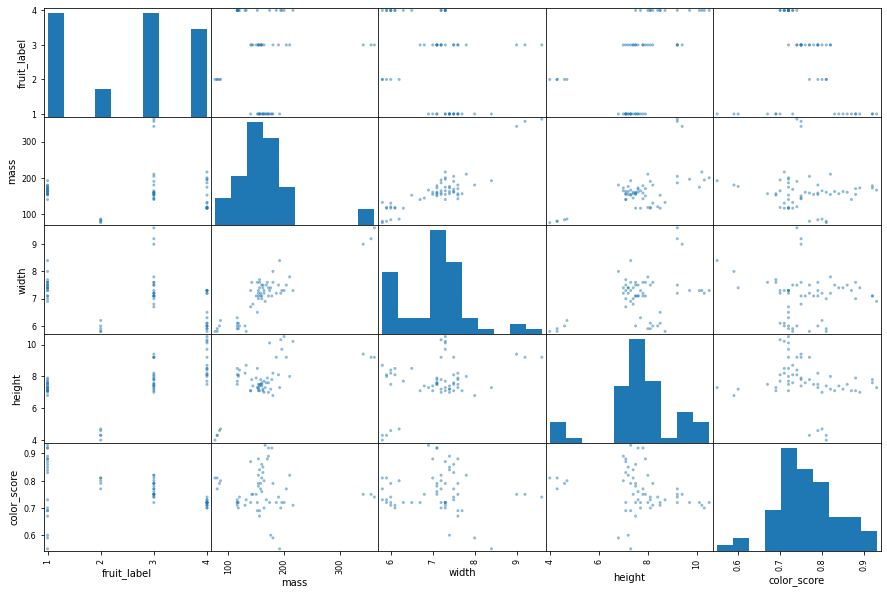

In [36]:
pd.plotting.scatter_matrix(fruits,figsize=(15,10));

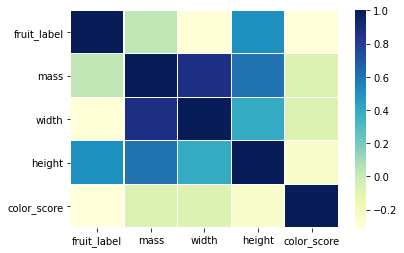

In [32]:
sn.heatmap(fruits.corr(),cmap="YlGnBu",linewidths=.1);

## 3- applying cross-validation on the dataset 

In [37]:
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.to_numpy()
y = y_fruits_2d.to_numpy()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validation score (3-fold): 0.797


In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is not to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data. Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately. To do this, the easiest way in scikit-learn is to use pipelines